# PCA and LDA Projection of Data
[Link to sklearn docs](http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#comparison-of-lda-and-pca-2d-projection-of-iris-dataset)
## Without Standardization

In [146]:
import pandas as pd
raw_data = pd.read_excel('data/training_data.xlsx')

In [147]:
# remove unneeded subject ID column
data = raw_data.drop('Subject', axis=1)
X = data.values[:,:-1]
y = data.values[:,-1]
target_names = ['Control', 'Parkinsons', 'MSA', 'PSP']



In [148]:
from sklearn.model_selection import train_test_split, GridSearchCV

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=44)

explained variance ratio (first two components): [0.81575099 0.18362611]


<IPython.core.display.Javascript object>


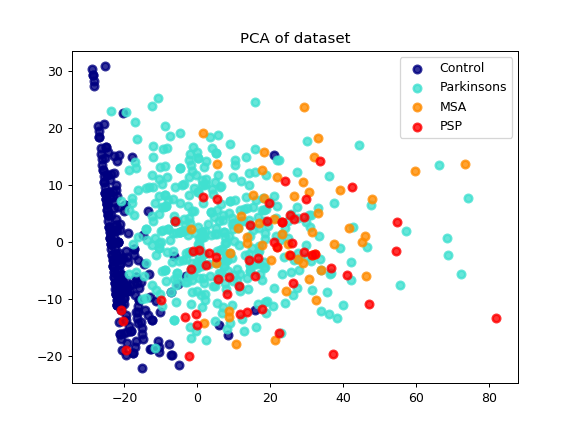

<IPython.core.display.Javascript object>


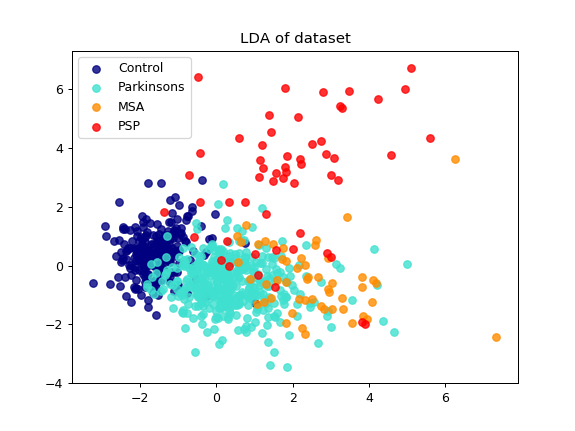

In [149]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange', 'red']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of dataset')

plt.show()

## With Standardization

In [150]:
import pandas as pd
raw_data = pd.read_excel('data/training_data.xlsx')

In [151]:
# remove unneeded subject ID column
data = raw_data.drop('Subject', axis=1)
X = data.values[:,:-1]
y = data.values[:,-1]
target_names = ['Control', 'Parkinsons', 'MSA', 'PSP']


In [152]:
#standardize the data
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X)
X = std_scale.transform(X)


[0.53255373 0.30551775 0.16192852]
explained variance ratio (first two components): [0.19583853 0.12767566]


<IPython.core.display.Javascript object>


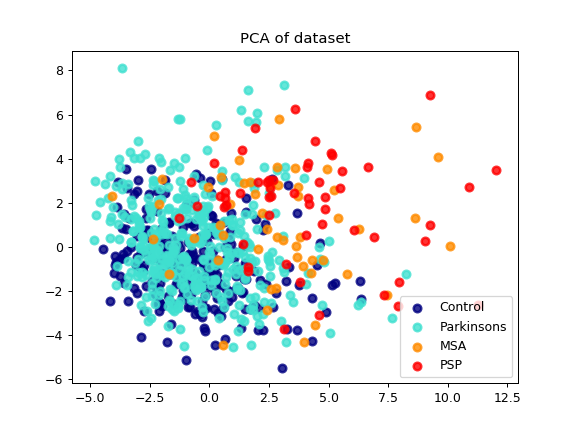

<IPython.core.display.Javascript object>


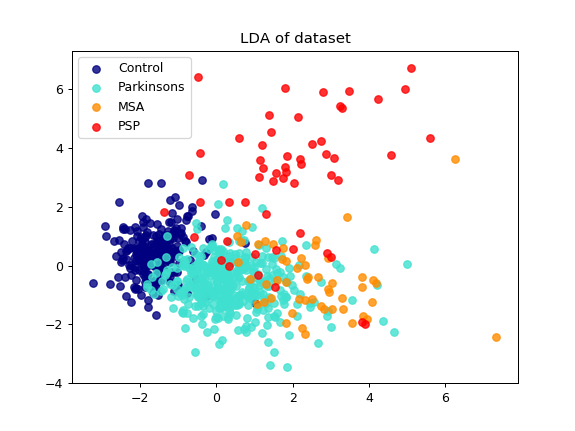

In [153]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=10)
X_r2 = lda.fit(X, y).transform(X)


print(lda.explained_variance_ratio_)
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange', 'red']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of dataset')

plt.show()



<IPython.core.display.Javascript object>


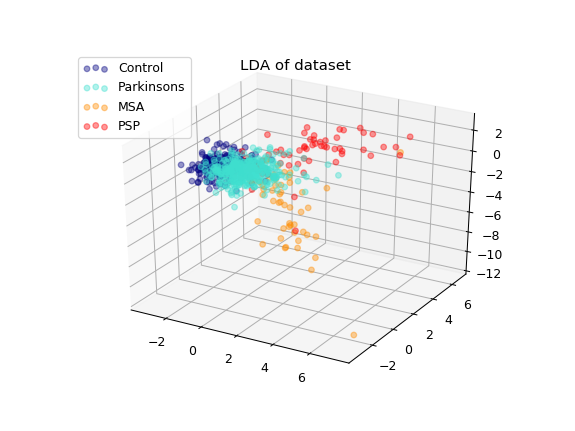

In [154]:
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
    ax.scatter(X_r2[y == i, 0], X_r2[y == i, 1], X_r2[y == i, 2], alpha=.4, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=3)
plt.title('LDA of dataset')

plt.show()

In [177]:
from sklearn import svm
from sklearn.metrics import classification_report

def svm_grid_search(X_train, X_test, y_train, y_test, cv=5):

    tuned_parameters = [{'kernel': ['linear'], 'C': [1]}]

    print("# Tuning hyper-parameters for f1")
    print()

    clf = GridSearchCV(svm.SVC(), tuned_parameters, cv=cv,
                       scoring='f1_macro',
                       n_jobs = -1 )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()
    
    return clf

In [178]:
from sklearn.utils import resample

def resample_data(df):
    df_control =df[df.GroupID==0]  #246
    df_park = df[df.GroupID==1] #399
    df_msa = df[df.GroupID==2]  #52
    df_psp = df[df.GroupID==3]  #55

    max_length = max([len(df_park), len(df_msa), len(df_psp), len(df_control)])

    if len(df_control) > 0:
        df_control = resample(df_control, replace=True, n_samples=max_length, random_state=3)
    if len(df_msa) > 0:
        df_msa = resample(df_msa, replace=True, n_samples=max_length, random_state=1)
    if len(df_psp) > 0:
        df_psp = resample(df_psp, replace=True, n_samples=max_length, random_state=2)

    return pd.concat([df_control, df_park, df_msa, df_psp])

### Test Train Split


(746, 38)
(1596, 38)
explained variance ratio (LDA): [0.58840312 0.31923686 0.09236002]


<IPython.core.display.Javascript object>


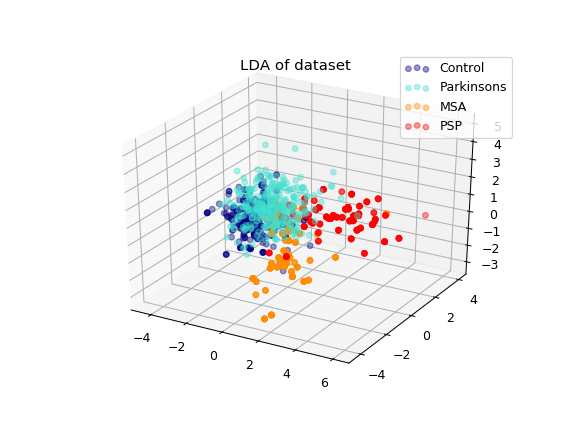

In [179]:
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd

raw_data = pd.read_excel('data/training_data.xlsx')

# remove unneeded subject ID column
data = raw_data.drop('Subject', axis=1)

data_resampled = resample_data(data)

print(data.shape)
print(data_resampled.shape)

X = data_resampled.values[:,:-1]
y = data_resampled.values[:,-1]
target_names = ['Control', 'Parkinsons', 'MSA', 'PSP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=44)


#standardize the data
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)


lda = LinearDiscriminantAnalysis(n_components=3)
X_train_lda = lda.fit(X_train_std, y_train).transform(X_train_std)
X_test_lda = lda.fit(X_train_std, y_train).transform(X_test_std)

print('explained variance ratio (LDA): %s'
      % str(lda.explained_variance_ratio_))


%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
    ax.scatter(X_train_lda[y_train == i, 0], X_train_lda[y_train == i, 1], X_train_lda[y_train == i, 2], alpha=.4, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=3)
plt.title('LDA of dataset')

plt.show()

In [180]:
clf = svm_grid_search(X_train_lda, X_test_lda, y_train, y_test, cv=5)

# Tuning hyper-parameters for f1

Best parameters set found on development set:

{'C': 1, 'kernel': 'linear'}

Grid scores on development set:

0.835 (+/-0.032) for {'C': 1, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

        0.0       0.88      0.91      0.90        80
        1.0       0.77      0.80      0.79        92
        2.0       0.85      0.85      0.85        71
        3.0       0.89      0.81      0.84        77

avg / total       0.84      0.84      0.84       320




In [182]:
model = clf.best_estimator_

validation_data = pd.read_excel('./data/Validation.xlsx')
validation_data = validation_data.drop('GUID', axis=1)
validation_data = validation_data.drop('Subject', axis=1)
validation_data = validation_data[data.columns]

validation_data

X_valid = validation_data.values[:,:-1]
y_valid = validation_data.values[:,-1]

X_valid_std = std_scale.transform(X_valid)
X_valid_lda = lda.transform(X_valid_std)

model.score(X_valid_lda, y_valid)


0.74

### Plot the validation data on the LDA plot

In [168]:
print(data.columns)
print(validation_data.columns)

Index(['Age', 'Sex', 'UPDRS', 'aSN_FA', 'Caudate_FA', 'CC2_FA', 'GP_FA',
       'LobuleVI_FA', 'LobuleV_FA', 'MCP_FA', 'pSN_FA', 'Putamen_FA', 'SCP_FA',
       'STN_FA', 'Thalamus_FA', 'Vermis_FA', 'RN_FA', 'PPN_FA', 'Dentate_FA',
       'CC1_FA', 'aSN_FW', 'Caudate_FW', 'CC2_FW', 'GP_FW', 'LobuleVI_FW',
       'LobuleV_FW', 'MCP_FW', 'pSN_FW', 'Putamen_FW', 'SCP_FW', 'STN_FW',
       'Thalamus_FW', 'Vermis_FW', 'RN_FW', 'PPN_FW', 'Dentate_FW', 'CC1_FW',
       'GroupID'],
      dtype='object')
Index(['Age', 'Sex', 'UPDRS', 'aSN_FA', 'Caudate_FA', 'CC2_FA', 'GP_FA',
       'LobuleVI_FA', 'LobuleV_FA', 'MCP_FA', 'pSN_FA', 'Putamen_FA', 'SCP_FA',
       'STN_FA', 'Thalamus_FA', 'Vermis_FA', 'RN_FA', 'PPN_FA', 'Dentate_FA',
       'CC1_FA', 'aSN_FW', 'Caudate_FW', 'CC2_FW', 'GP_FW', 'LobuleVI_FW',
       'LobuleV_FW', 'MCP_FW', 'pSN_FW', 'Putamen_FW', 'SCP_FW', 'STN_FW',
       'Thalamus_FW', 'Vermis_FW', 'RN_FW', 'PPN_FW', 'Dentate_FW', 'CC1_FW',
       'GroupID'],
      dtype='object')
